In [4]:
import seaborn
import numpy as np
import matplotlib.pyplot as plt

from io import BytesIO
from pandas import read_csv
from IPython.display import set_matplotlib_formats

%matplotlib inline

kw = {'axes.edgecolor': '0', 'text.color': '0', 'ytick.color': '0', 'xtick.color': '0',
      'ytick.major.size': 5, 'xtick.major.size': 5, 'axes.labelcolor': '0'}

seaborn.set_style("whitegrid", kw)

In [5]:
kw = dict(na_values='NaN', sep=',', encoding='utf-8',
          skipinitialspace=True, index_col=False, low_memory=False)

df = read_csv("Dados_Corvinas_BDE99.csv", **kw)


#Retira os valores que tiverem recuperação fora do intervalo 50 - 120
mask_recovery_liver = np.logical_and(df['Liver Recovery'] <= 120, df['Liver Recovery'] >= 50)
df = df[mask_recovery_liver]

mask_recovery_muscle = np.logical_and(df['Muscle Recovery'] <= 120, df['Muscle Recovery'] >= 50)
df = df[mask_recovery_muscle]

In [6]:
#Mostra com o tipo de dado em cada coluna
df.dtypes

Experiment          object
Day                  int64
Sample              object
ID Liver            object
Weight (g)         float64
Size (cm)          float64
Liver Recovery     float64
%Lip Liver         float64
Liver Weight       float64
LSI                float64
CF                 float64
BDE47 Liver        float64
BDE99 Liver        float64
ID Muscle           object
%Lip Muscle        float64
Muscle Recovery    float64
BDE47 Muscle       float64
BDE99 Muscle       float64
dtype: object

In [7]:
#Preview da tabela
df.head()

,Experiment,Day,Sample,ID Liver,Weight (g),Size (cm),Liver Recovery,%Lip Liver,Liver Weight,LSI,CF,BDE47 Liver,BDE99 Liver,ID Muscle,%Lip Muscle,Muscle Recovery,BDE47 Muscle,BDE99 Muscle
0,BDE99,0,A,1997 F,20.09,12.8,73.21,3.6,0.14,0.70,0.96,0,0,2141 Z,5.04,83.60,0,0
1,BDE99,0,B,1998 G,36.52,15.5,98.24,2.3,0.33,0.90,0.98,0,0,2178 L,6.00,90.99,0,0
2,BDE99,0,C,1999 H,28.74,14.7,89.71,3.5,0.25,0.87,0.90,0,0,2179 M,4.08,75.73,0,0
3,BDE99,1,A,2014 X,23.70,14.0,78.40,1.3,0.15,0.63,0.86,0,0,2208 Q,0.58,77.78,0,0
4,BDE99,1,B,2015 Y,32.80,15.0,66.24,2.8,0.20,0.61,0.97,0,0,2209 R,0.94,101.63,0,0


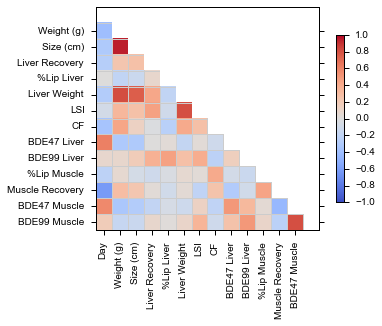

In [8]:
#Correlação de todos versus todos
ax = seaborn.corrplot(df, annot=False, diag_names=False)

In [9]:
#Média por dia
g = df.groupby('Day')
mean_df = g.mean()
mean_df.head()
#g.describe().head()

,Weight (g),Size (cm),Liver Recovery,%Lip Liver,Liver Weight,LSI,CF,BDE47 Liver,BDE99 Liver,%Lip Muscle,Muscle Recovery,BDE47 Muscle,BDE99 Muscle
Day,,,,,,,,,,,,,
0,28.450000,14.333333,87.053333,3.133333,0.240000,0.823333,0.946667,0.000000,0.000000,5.040000,83.440000,0.000,0.000000
1,30.816667,14.750000,75.811667,2.683333,0.213333,0.680000,0.950000,38.971667,48.215000,3.270000,98.410000,0.000,0.000000
5,31.000000,14.700000,61.190000,0.400000,0.300000,0.970000,0.980000,0.000000,0.000000,0.900000,68.440000,0.000,0.000000
15,38.281667,16.116667,100.538333,0.816667,0.326667,0.836667,0.908333,59.946667,106.576667,1.306667,83.255000,0.000,0.000000
30,26.685000,14.333333,101.875000,1.600000,0.256667,0.946667,0.898333,279.356667,149.991667,1.511667,72.633333,66.045,73.911667


In [10]:
#Médiana por dia
g = df.groupby('Day')
median_df = g.median()
median_df.head()
#g.describe().head()

,Weight (g),Size (cm),Liver Recovery,%Lip Liver,Liver Weight,LSI,CF,BDE47 Liver,BDE99 Liver,%Lip Muscle,Muscle Recovery,BDE47 Muscle,BDE99 Muscle
Day,,,,,,,,,,,,,
0,28.740,14.70,89.710,3.50,0.250,0.870,0.960,0.000,0.000,5.040,83.600,0.00,0.00
1,32.350,14.75,70.800,2.25,0.225,0.660,0.945,0.000,0.000,3.060,98.600,0.00,0.00
5,31.000,14.70,61.190,0.40,0.300,0.970,0.980,0.000,0.000,0.900,68.440,0.00,0.00
15,39.460,16.30,102.200,0.80,0.350,0.880,0.890,0.000,76.615,0.425,85.725,0.00,0.00
30,25.225,14.20,103.775,1.50,0.240,0.945,0.910,231.845,191.610,1.400,70.320,76.15,85.01


/usr/lib/python3.4/site-packages/seaborn/utils.py:247: UserWarning: `offset_spines` is deprecated and will be removed in v0.5
  warnings.warn(warn_msg, UserWarning)


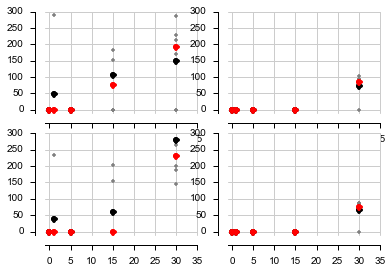

In [11]:
#Gráfico com a distribuição do BDE99 e BDE47 (fígado e músculo) ao longo dos dias (todos os dados x média x mediana) 
# ASSIMILAÇÃO

fig, ax = plt.subplots(2,2)

p = ax[0,0].plot(df['Day'], df['BDE99 Liver'], '.', color='gray', label='data')
m = ax[0,0].plot(mean_df.index, mean_df['BDE99 Liver'], 'ko', label='mean')
n = ax[0,0].plot(median_df.index, median_df['BDE99 Liver'], 'ro', label='median')
ax[0,0].axis([-1, 35, -10, 300])
ax[0,0].grid(True)
#ax[0,0].legend(numpoints=1)

p = ax[0,1].plot(df['Day'], df['BDE99 Muscle'], '.', color='gray', label='data')
m = ax[0,1].plot(mean_df.index, mean_df['BDE99 Muscle'], 'ko', label='mean')
n = ax[0,1].plot(median_df.index, median_df['BDE99 Muscle'], 'ro', label='median')
ax[0,1].axis([-1, 35, -10, 300])
ax[0,1].grid(True)
#ax[0,1].legend(numpoints=1)

p = ax[1,0].plot(df['Day'], df['BDE47 Liver'], '.', color='gray', label='data')
m = ax[1,0].plot(mean_df.index, mean_df['BDE47 Liver'], 'ko', label='mean')
n = ax[1,0].plot(median_df.index, median_df['BDE47 Liver'], 'ro', label='median')
ax[1,0].axis([-1, 35, -10, 300])
ax[1,0].grid(True)
#ax[1,0].legend(numpoints=1)

p = ax[1,1].plot(df['Day'], df['BDE47 Muscle'], '.', color='gray', label='data')
m = ax[1,1].plot(mean_df.index, mean_df['BDE47 Muscle'], 'ko', label='mean')
n = ax[1,1].plot(median_df.index, median_df['BDE47 Muscle'], 'ro', label='median')
ax[1,1].axis([-1, 35, -10, 300])
ax[1,1].grid(True)
#ax[1,0].legend(numpoints=1)

seaborn.despine(trim=False)
seaborn.offset_spines()

p_value = 0.002, std_err = 0.63
p_value = 0.251, std_err = 4.96


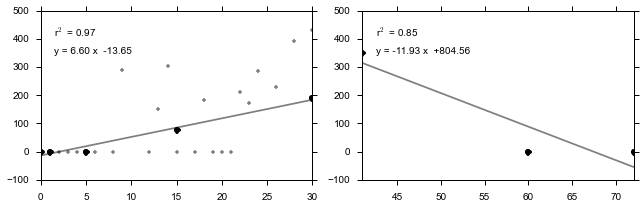

In [12]:
from scipy import stats
assim = median_df.ix[:30]
depur = median_df.ix[41:]
var = "BDE99 Liver"

def plot_linregress(ax, x, y):
    ax.plot(x, y, 'ko')
    ax.grid(False)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    print('p_value = %0.3f, std_err = %0.2f' % (p_value, std_err))
    xlim, ylim = (x[0], x[-1]), (y[0], y[-1])
    y_line = slope * np.array(xlim) + intercept
    ax.plot(xlim, y_line, 'k', alpha=0.5)
    ax.set_xlim(xlim)
    ax.text(0.05, 0.85, r'r$^2$ = %.2f' % r_value**2, transform=ax.transAxes)
    ax.text(0.05, 0.75, 'y = %0.2f x  %+0.2f' % (slope, intercept), transform=ax.transAxes)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9, 3))

ax0.plot(df.index, df[var], 'k.', alpha=0.5)
x, y = assim.index.values, assim[var].values
plot_linregress(ax0, x, y)

ax1.plot(df.index, df[var], 'k.', alpha=0.5)
x, y = depur.index.values, depur[var].values
plot_linregress(ax1, x, y)

fig.tight_layout()

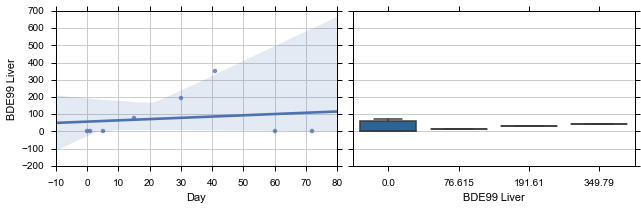

In [13]:
median_df['Day'] = median_df.index

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(9, 3))
seaborn.regplot("Day", "BDE99 Liver", median_df, ax=ax1)
seaborn.boxplot(median_df["Day"], median_df["BDE99 Liver"], color="Blues_r", ax=ax2).set_ylabel("")
fig.tight_layout()

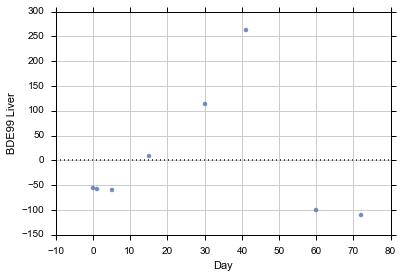

In [81]:
ax = seaborn.residplot("Day", "BDE99 Liver", median_df)

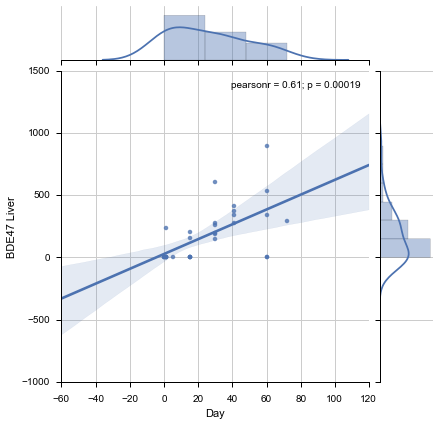

In [107]:
ax = seaborn.jointplot("Day", "BDE47 Liver", df, kind="reg")